In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.units import gram, centimeter, second, speed_of_light
from sympy.physics.units.util import convert_to
import matplotlib.style as style
style.use('dark_background')
plt.rcParams['text.usetex'] = False

In [2]:
#vars
B0, R, omega, alpha, M = sp.symbols('B0 R omega alpha M')

#power in cgs
P_expr = (B0**2 * R**6 * omega**4 * sp.sin(alpha)**2) / (6 * speed_of_light**3)

#tau in cgs
I_expr = (2/5) * M * R**2
tau_expr = (3 * I_expr * speed_of_light**3) / (B0**2 * R**6 * omega**2 * sp.sin(alpha)**2)

#simplify
P_expr_simplified = sp.simplify(P_expr)
tau_expr_simplified = sp.simplify(tau_expr)
print('my expressions for P and tau respectivley are:\n')
display(P_expr_simplified, tau_expr_simplified)


my expressions for P and tau respectivley are:



B0**2*R**6*omega**4*sin(alpha)**2/(6*speed_of_light**3)

1.2*speed_of_light**3*M/(B0**2*R**4*omega**2*sin(alpha)**2)

In [ ]:
print('my derived equation is:')
display(sp.Eq(sp.Symbol('P'), P_expr_simplified))

print('generalized dim analysis:')
display(sp.Symbol('Mass') * sp.Symbol('Length')**2 / sp.Symbol('Time')**3)

print('in CGS:')
B0_unit = (gram**0.5 / (centimeter**0.5 * second))
R_unit = centimeter
omega_unit = 1 / second
c_unit = centimeter / second
P_units = (B0_unit**2 * R_unit**6 * omega_unit**4) / (c_unit**3)
display(convert_to(P_units, [gram, centimeter, second]))

#do this for sub erg/s and also for tau.


my derived equation is:


Eq(P, B0**2*R**6*omega**4*sin(alpha)**2/(6*speed_of_light**3))

generalized dim analysis:


Length**2*Mass/Time**3

in CGS:


1.0*centimeter**2.0*gram**1.0/second**3

In [4]:
def pulsar_power_and_tau(B0, R, omega, alpha_deg, M):
    c = 3e10
    alpha_rad = np.radians(alpha_deg)

    P = (B0**2 * R**6 * omega**4 * np.sin(alpha_rad)**2) / (6 * c**3)
    I = (2/5) * M * R**2
    tau = (3 * I * c**3) / (B0**2 * R**6 * omega**2 * np.sin(alpha_rad)**2)

    P_sci = '{:.2e}'.format(P)
    tau_sci = '{:.2e}'.format(tau)
    tau_yrs = tau / (60 * 60 * 24 * 365.25)
    tau_yrs_str = '{:,.0f} years'.format(tau_yrs)

    print(f'With the omega value {omega}, the power and spin down time is:')
    display(P_sci, tau_sci, tau_yrs_str)


In [5]:
M = 2e33
R = 1e6
B0 = 1e12
alpha_deg = 90
cases = [1e4, 1e3, 1e2]

for w in cases:
    pulsar_power_and_tau(B0, R, w, alpha_deg, M)


With the omega value 10000.0, the power and spin down time is:


'6.17e+43'

'6.48e+08'

'21 years'

With the omega value 1000.0, the power and spin down time is:


'6.17e+39'

'6.48e+10'

'2,053 years'

With the omega value 100.0, the power and spin down time is:


'6.17e+35'

'6.48e+12'

'205,339 years'

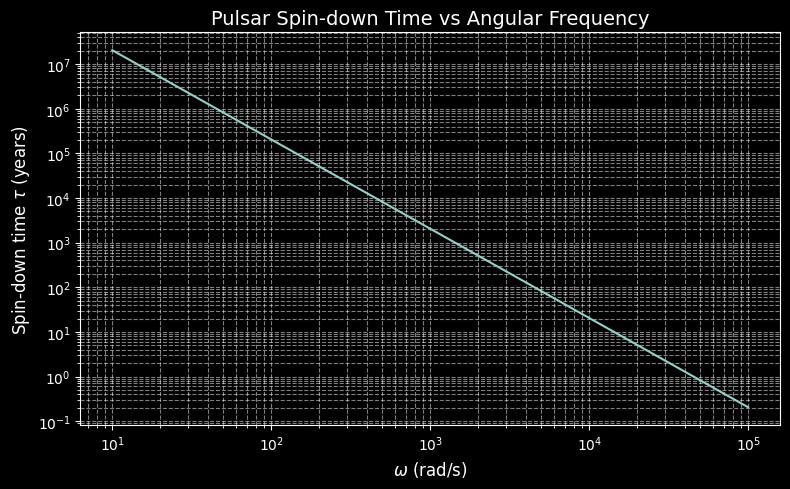

In [6]:
def plot_spin_down_times(B0, R, M, alpha_deg):
    omegas = np.logspace(1, 5, 300)
    c = 3e10
    alpha_rad = np.radians(alpha_deg)
    I = (2/5) * M * R**2

    taus_sec = (3 * I * c**3) / (B0**2 * R**6 * omegas**2 * np.sin(alpha_rad)**2)
    taus_yrs = taus_sec / (60 * 60 * 24 * 365.25)

    plt.figure(figsize=(8, 5))
    plt.plot(omegas, taus_yrs)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\omega$ (rad/s)', fontsize=12)
    plt.ylabel(r'Spin-down time $\tau$ (years)', fontsize=12)
    plt.title('Pulsar Spin-down Time vs Angular Frequency', fontsize=14)
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_spin_down_times(B0=1e12, R=1e6, M=2e33, alpha_deg=90)
